# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

((Hard) Data pekerjaan di indonesia pada  https://www.kalibrr.id/job-board/te/data/1)

- Secara pribadi, alasan saya mengambil kasus ini karena dengan data pekerjaan di indonesia dengan role job bagian Data, saya dapat memperkirakan diwilayah mana saja yang terdapat lowongan pekerjaan paling banyak dibuka. Setelah melihat itu, saya bisa menganalisis lebih lanjut untuk memutuskan biaya rata2 yang akan saya keluarkan di suatu kota saat saya bekerja dengan memperhitungan UMR yang ada pada kota tersebut dan mempertimbangkan kembali apakah UMR yang akan saya dapat sesuai dengan biaya kebutuhan hidup saya selama bekerja di kota tersebut. Lalu menyesuaikan kembali kebutuhan biaya lainnya yang saya keluarkan seperti kebutuhan pribadi ataupun kebutuhan biaya keluarga.

- Secara umum, alasan saya mengambil kasus ini karena dengan melihat banyaknya lowongan pekerjaan di bidang data yang dibuka, saya bisa melihat rata2 dalam 3 bulan kebelakang ini, yaitu januari-maret akhir, saya dapat mencari insight pekerjaan dengan role job apa saja yang paling banyak dibuka dan saya bisa melihat di kota mana yang total keseluruhan lowongan pekerjaan yang paling banyak dibuka dalam 3 bulan kebelakang di 2023 ini.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
# Import request untuk mengambil data dengan requests.get dari web kalibrr secara online
import requests

url_get = requests.get('https://www.kalibrr.id/job-board/te/data/1')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
# melihat URL code html yang telah kita ambil/scrap

url_get.content[1:500]

b'!DOCTYPE html><html lang="en"><head><meta name="viewport" content="width=device-width"/><meta charSet="utf-8"/><script type="application/ld+json">{\n    "@context": "https://schema.org",\n    "@type": "WebSite",\n    "url": "https://www.kalibrr.com",\n    "potentialAction": [\n      {\n        "@type": "SearchAction",\n        "target": "https://www.kalibrr.com/job-board/te/={search_term_string}",\n        "query-input": "required name=search_term_string"\n      }\n     ]\n  }</script><meta property="og:i'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
# Melakukan proses parsing(proses menguraikan data yang tidak terstruktur menjadi suatu struktur yang dapat diakses dan diproses oleh program komputer)

# import beautifulsoup untuk melakukan web scraping atau mengambil data dari halaman web yang telah di request. 
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [4]:
# Menyimpan informasi yang diambil dari 'data/tabel' dalam web kedalam variable table 

table = soup.find('div', attrs={'class':'k-border-b k-border-t k-border-tertiary-ghost-color md:k-border md:k-overflow-hidden md:k-rounded-lg'})

# prettify (agar tampilan code html lebih rapih saat dikeluarkan)
print(table.prettify()[1:500])

div class="k-border-b k-border-t k-border-tertiary-ghost-color md:k-border md:k-overflow-hidden md:k-rounded-lg">
 <div class="k-bg-white k-divide-y k-divide-solid k-divide-tertiary-ghost-color" itemscope="" itemtype="http://schema.org/ItemList">
  <style data-emotion="css 1b4vug6">
   .css-1b4vug6{grid-template-columns:5rem 1rem auto 1rem max-content;grid-template-rows:auto 0.25rem auto;}
  </style>
  <div class="k-grid k-border-tertiary-ghost-color k-text-sm k-p-4 md:k-p-6 css-1b4vug6" itempr


Finding row length.

In [5]:
# Sebelum looping
# menghitung panjang suatu list = len
# untuk membantu proses looping kita, kita butuh mencari tau dari panjang data yang kita punya berapa 
row_title = table.find_all('div', attrs={'class':'k-col-start-3 k-row-start-1'})
row_length_title = len(row_title)

row_lokasi = table.find_all('div', attrs={'class':'k-flex k-flex-col md:k-flex-row'})
row_length_lokasi = len(row_lokasi)

row_tdl = table.find_all('span', attrs={'class':'k-block k-mb-1'})
row_length_tdl = len(row_tdl)

row_company = table.find_all('span', attrs={'class':'k-inline-flex k-items-center k-mb-1'})
row_length_company = len(row_company)

print(row_length_title, row_length_lokasi, row_length_tdl, row_length_company)

15 15 15 15


Do the scrapping process here (please change this markdown with your explanation)

In [6]:
temp = [] #initiating a tuple (membuat list kosong untuk menyimpan hasil looping yang akan dibuat)

for i in range(0, row_length_title):
    
    # memasukan find_all untuk data title, company, lokasi dan tp_dl
    #sekarang code memasukan secara otomatis berdasarkan i yang dimulai dari 0 dengan pengulangan sepanjang row_length yaitu 51
    Title2 = table.find_all('div', attrs={'class':'k-col-start-3 k-row-start-1'})[i].text
    
    Company2 = table.find_all('span', attrs={'class':'k-inline-flex k-items-center k-mb-1'})[i].text
    
    Lokasi2 = table.find_all('div', attrs={'class':'k-flex k-flex-col md:k-flex-row'})[i].text
    
    TP_DL2 = table.find_all('span', attrs={'class':'k-block k-mb-1'})[i].text
    
 
    temp.append((Title2, Company2, Lokasi2, TP_DL2))
    #scrapping process
    
temp

[('Project Manager',
  'PGI Data',
  'Jakarta, Indonesia',
  'Posted 8 days ago • Apply before 29 Jun'),
 ('IT System Analyst',
  'PGI Data',
  'Jakarta, Indonesia',
  'Posted 15 days ago • Apply before 19 Apr'),
 ('Data Analytics Manager',
  'PT Adicipta Inovasi Teknologi',
  'Kota Jakarta Barat, Indonesia',
  'Posted 5 days ago • Apply before 29 Apr'),
 ('DevOps and Data Engineer',
  'Mobius Digital',
  'Tangerang Selatan, Indonesia',
  'Posted 7 days ago • Apply before 13 May'),
 ('Network  Security Engineer',
  'PGI Data',
  'Jakarta, Indonesia',
  'Posted 6 days ago • Apply before 19 Apr'),
 ('Data Quality Analyst',
  'Astra Financial',
  'Central Jakarta City, Indonesia',
  'Posted 8 days ago • Apply before 1 May'),
 ('Data Scientist',
  'Mobius Digital',
  'Tangerang Selatan, Indonesia',
  'Posted 25 days ago • Apply before 15 May'),
 ('Data Entry',
  'PT. Royal Trust',
  'South Jakarta, Indonesia\u2004·\u2004IDR\xa04,000,000.00 - IDR\xa05,000,000.00  / month',
  'Posted 11 days

## Creating data frame & Data wrangling

Put the array into dataframe

In [7]:
# Membuat dataframe dari hasil looping yang kita buat dengan pandas

import pandas as pd

df = pd.DataFrame(temp, columns = ('Titles', 'Companys', 'Lokasis', 'TP_DLs'))
df.head()

,Titles,Companys,Lokasis,TP_DLs
0,Project Manager,PGI Data,"Jakarta, Indonesia",Posted 8 days ago • Apply before 29 Jun
1,IT System Analyst,PGI Data,"Jakarta, Indonesia",Posted 15 days ago • Apply before 19 Apr
2,Data Analytics Manager,PT Adicipta Inovasi Teknologi,"Kota Jakarta Barat, Indonesia",Posted 5 days ago • Apply before 29 Apr
3,DevOps and Data Engineer,Mobius Digital,"Tangerang Selatan, Indonesia",Posted 7 days ago • Apply before 13 May
4,Network Security Engineer,PGI Data,"Jakarta, Indonesia",Posted 6 days ago • Apply before 19 Apr


---------------------

# Cara diatas membutuhkan banyak waktu untuk mengambil data dari halaman yang berbeda dalam web tersebut, karena harus berulang membuat variabel tabel baru dan variabel row lainnya, juga harus berulang kali melakukan looping

## **Jadi saya menggunakan looping kembali terhadap pengambilan web scraping untuk 15 halaman yang berbeda**

1. ***Finding the right key to scrap the data  & Extracting the right information (5 points)***

In [8]:
import time # Melakukan import time untuk memberikan jeda saat pengambilan data dari setiap halaman

temp_new = [] # tuple (untuk menampung hasil akhir data yang dikeluarkan)

# Melakukan loop untuk 15 halaman pertama
for page_num in range(1, 16):
    
    # Mengirim permintaan GET ke website dan mem-parse konten HTML
    url = f'https://www.kalibrr.id/id-ID/job-board/te/data/{page_num}'
    response = requests.get(url)
    soup2 = BeautifulSoup(response.content, 'html.parser')

    # Mencari 15 elemen div dengan class 'class-div' pada halaman tersebut
    Title = soup2.find_all('div', {'class': 'k-col-start-3 k-row-start-1'})[:15]
    
    # Mencari 15 elemen span dengan class 'class-span' pada halaman tersebut
    Company = soup2.find_all('span', {'class': 'k-inline-flex k-items-center k-mb-1'})[:15]
    
      # Mencari 15 elemen span dengan class 'class-div' pada halaman tersebut
    Lokasi = soup2.find_all('div', {'class': 'k-flex k-flex-col md:k-flex-row'})[:15]
    
      # Mencari 15 elemen span dengan class 'class-span' pada halaman tersebut
    Date_work_and_submit = soup2.find_all('span', {'class': 'k-block k-mb-1'})[:15]

    # Menampilkan teks dari 15 elemen div yang ditemukan pada halaman tersebut
    for div_element in Title:
        print(div_element.text.strip())

    # Menampilkan teks dari 15 elemen span yang ditemukan pada halaman tersebut
    for span_element in Company:
        print(span_element.text.strip())
        
        # Menampilkan teks dari 15 elemen span yang ditemukan pada halaman tersebut
    for div_element2 in Lokasi:
        print(div_element2.text.strip())
        
        # Menampilkan teks dari 15 elemen span yang ditemukan pada halaman tersebut
    for span_element2 in Date_work_and_submit:
        print(span_element2.text.strip())

    # Memberikan jeda selama 1 detik sebelum melanjutkan ke halaman selanjutnya
    time.sleep(1)
    
    # Menambahkan data yang telah di looping secara otomatis (dengan append) ke masing2 variabel
    temp_new.append((Title, Company, Lokasi, Date_work_and_submit)) 

# Menambahkan len agar code html tidak muncul setelah looping selesai
print(len(temp_new))

Project Manager
IT System Analyst
Data Analytics Manager
DevOps and Data Engineer
Network  Security Engineer
Data Quality Analyst
Data Scientist
Data Entry
Senior Data Analyst
Data Engineer
Data Engineer
Data Scientist
Program Staf Pendukung Operasi (PSPO)
Learning Operations Manager
Content & Campaign Marketing
PGI Data
PGI Data
PT Adicipta Inovasi Teknologi
Mobius Digital
PGI Data
Astra Financial
Mobius Digital
PT. Royal Trust
paper.id
Nomura Research Institute Indonesia
PT Global Urban Esensial
MileApp
PT Bank Central Asia Tbk
Rakamin Academy
Astra Financial
Jakarta, Indonesia
Jakarta, Indonesia
Kota Jakarta Barat, Indonesia
Tangerang Selatan, Indonesia
Jakarta, Indonesia
Central Jakarta City, Indonesia
Tangerang Selatan, Indonesia
South Jakarta, Indonesia · Rp 4.000.000,00 - Rp 5.000.000,00  / bulan
North Jakarta, Indonesia
Jakarta Pusat, Indonesia · Rp 10.000.000,00 - Rp 20.000.000,00  / bulan
South Tangerang, Indonesia
West Jakarta, Indonesia
Central Jakarta, Indonesia
South Jaka

Bancassurance Officer (Area: Balikpapan, Banjarmasin, Batam, Pekanbaru, Tebing Tinggi, Rantau Prapat)
Centralized Data Processing
Senior Software Engineer - Backend (Java) (Remote)
Sales Supervisor - SP Sukabumi
Kepala Produksi Bread Crumb
Sales Supervisor - SP Jember
Customer Relations Coordinator
Product Marketing Internship
IT Implementor
Junior Backend Developer
Marketing Manager
Kepala Pabrik Makanan
System & Cloud Engineer
Lead Product Manager
Head Sales & Marketing
PT Panin Dai-Ichi Life (Bancassurance)
PT BFI Finance Indonesia Tbk
Flip.id
Sharon Bakery (PT Multi Star Rukun Abadi)
Sharon Bakery (PT Multi Star Rukun Abadi)
Sharon Bakery (PT Multi Star Rukun Abadi)
Plaza Auto Group
OY! Indonesia
Code.id
AITINDO
PT Ocean Centra Furnindo
Sharon Bakery (PT Multi Star Rukun Abadi)
DOKU, PT NUSA SATU INTI ARTHA
PT Global Urban Esensial
PT Ocean Centra Furnindo
Banjarmasin, Indonesia
Tangerang, Indonesia
Depok City, Indonesia
Sukabumi City, Indonesia
Bandung Kabupaten, Indonesia
Jember,

Full Stack Engineer
Customer Development Leader - Food Service (CDL FS) Jakarta
DevOps Engineer (Jakarta and Malang)
System Administrator
Web Developer
Head of Sales
Product Development Specialist | PinjamModal
Salesforce Developer
IT Developer
.NET Developer
Business Operation Associate
IT Asset Management Staff
HR Compensation & Benefits
Network Engineer (Bahasa Mandarin)
Field Asset Management - Lombok Barat
PT Transnovasi Bangun Persada
Kraft Heinz ABC Indonesia
paper.id
Niagahoster
Great Giant Foods
Tinkerlust
PT BFI Finance Indonesia Tbk
Mitra Solusi Infokom
PT Adi Data Informatika
MITech
paper.id
PT Bank Central Asia Tbk
GITS Indonesia
PT Bank Central Asia Tbk
PT BFI Finance Indonesia Tbk
Jakarta, Indonesia · Rp 7.000.000,00 - Rp 10.000.000,00  / bulan
South Jakarta, Indonesia
North Jakarta, Indonesia
Sleman, Indonesia
Jakarta, Indonesia
South Jakarta, Indonesia
Tangerang, Indonesia
Jakarta Barat, Indonesia
Jakarta Barat, Indonesia · Rp 7.000.000,00 - Rp 20.000.000,00  / bulan
J

15


## **Setelah melakukan looping web scraping diatas, selanjutnya saya melakukan proses ekstraksi data terlebih dahulu. Lalu menggabungkan 4 variable list yang sudah dibuat kedalam 1 data**

Proses ekstraksi diperlukan untuk mengambil informasi dari halaman web yang diinginkan dan menyimpannya dalam format yang lebih mudah untuk diproses dan dianalisis. Dalam kode di atas, informasi seperti judul pekerjaan, nama perusahaan, lokasi, tanggal pekerjaan diposting dan deadline pekerjaan bisa disubmit dari halaman web dengan menggunakan BeautifulSoup dan disimpan dalam bentuk tuple pada variabel temp_new. Kemudian, variabel temp_new digunakan untuk mengubah format data menjadi list of tuples dalam variabel data, yang akan lebih mudah diproses dan dianalisis. Dalam hal ini, setiap elemen dalam list of tuples terdiri dari empat elemen yang mewakili judul pekerjaan, nama perusahaan, lokasi, tanggal post dan deadline.

1. **Mengekstrak teks judul (title_new), nama perusahaan (companies_new), lokasi (location_new), dan tanggal (DateWorkSubmit_new) dari elemen yang ditunjuk oleh indeks 0, 1, 2, dan 3 dari variabel page_data, masing-masing menggunakan fungsi text.strip().**

2. **Menambahkan isi list yang baru saja dibentuk ke dalam variabel "data" dengan operator penambahan list (+=).**

3. **Menggabungkan keempat list yang baru saja dihasilkan (title_new, companies_new, location_new, dan DateWorkSubmit_new) ke dalam sebuah list dengan menggunakan fungsi list(zip()).**

In [9]:
# proses ekstraksi data dari variabel "temp_new"

data = []
for page_data in temp_new:
    
    #1 Mengekstrak list yang telah dibuat dalam looping sebelumnya menjadi informasi text
    title_new = [Title.text.strip() for Title in page_data[0]]
    companies_new = [Company.text.strip() for Company in page_data[1]]
    location_new = [Lokasi.text.strip() for Lokasi in page_data[2]]
    DateWorkSubmit_new = [Date_work_and_submit.text.strip() for Date_work_and_submit in page_data[3]]
    
    #2 Menambahkan list yang baru saja dibentuk dengan operator penambahan list (+=) dan menggabungkannya dengan list(zip())
    data += list(zip(title_new, companies_new, location_new, DateWorkSubmit_new))

------------

## **Setelah selesai melakukan proses ekstraksi, saya melakukan pembuatan dataframe berdasarkan variabel data yang telah saya buat dan melakukan proses data wrangling**

2. ***Creating data frame & Data wrangling (5 points)***

In [10]:
# Membuat dataframe dari data

df_new = pd.DataFrame(data, columns=['Title', 'Company', 'Lokasi', 'Date_work_and_submit'])

In [11]:
df_new

,Title,Company,Lokasi,Date_work_and_submit
0,Project Manager,PGI Data,"Jakarta, Indonesia",Posted 8 days ago • Apply before 29 Jun
1,IT System Analyst,PGI Data,"Jakarta, Indonesia",Posted 15 days ago • Apply before 19 Apr
2,Data Analytics Manager,PT Adicipta Inovasi Teknologi,"Kota Jakarta Barat, Indonesia",Posted 5 days ago • Apply before 29 Apr
3,DevOps and Data Engineer,Mobius Digital,"Tangerang Selatan, Indonesia",Posted 7 days ago • Apply before 13 May
4,Network Security Engineer,PGI Data,"Jakarta, Indonesia",Posted 6 days ago • Apply before 19 Apr
...,...,...,...,...
220,Account Manager (Production House),IDN Media,"Jakarta, Indonesia",Posted 22 days ago • Apply before 29 May
221,Leadership Acceleration Program (MT) HR Organi...,Great Giant Foods,"Jakarta, Indonesia",Posted 30 minutes ago • Apply before 11 May
222,Database Administrator,PT Adi Data Informatika,"Jakarta Barat, Indonesia",Posted 3 months ago • Apply before 30 Jul
223,Assistant Personal Banker,PT Bank Central Asia Tbk,"Central Jakarta, Indonesia",Posted 6 months ago • Apply before 12 Dec


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [12]:
# Melihat tipe data terlebih dahulu

df_new.dtypes

Title                   object
Company                 object
Lokasi                  object
Date_work_and_submit    object
dtype: object

In [13]:
# Melihat jumlah nilai unik pada kolom company

df_new['Company'].nunique()

100

In [14]:
# saya memutuskan untuk mengganti tipe data company menjadi category karena ada beberapa perusahaan yang sama melakukan postingan pekerjaan dalam job role lain

df_new['Company'] = df_new['Company'].astype("category")

In [15]:
# Melihat jumlah unique untuk melihat keanehan dalam setiap data di kolom "Lokasi"

df_new['Lokasi'].unique()

array(['Jakarta, Indonesia', 'Kota Jakarta Barat, Indonesia',
       'Tangerang Selatan, Indonesia', 'Central Jakarta City, Indonesia',
       'South Jakarta, Indonesia\u2004·\u2004Rp\xa04.000.000,00 - Rp\xa05.000.000,00  / bulan',
       'North Jakarta, Indonesia',
       'Jakarta Pusat, Indonesia\u2004·\u2004Rp\xa010.000.000,00 - Rp\xa020.000.000,00  / bulan',
       'South Tangerang, Indonesia', 'West Jakarta, Indonesia',
       'Central Jakarta, Indonesia', 'South Jakarta, Indonesia',
       'Jakarta Pusat, Indonesia', 'Surabaya, Indonesia',
       'Malang Kota, Indonesia', 'Denpasar, Indonesia',
       'Jakarta, Indonesia\u2004·\u2004Rp\xa072.000.000,00 - Rp\xa078.000.000,00  / tahun',
       'Jakarta Selatan, Indonesia', 'East Jakarta, Indonesia',
       'Tangerang, Indonesia',
       'Jakarta Selatan, Indonesia\u2004·\u2004Rp\xa06.000.000,00 - Rp\xa012.000.000,00  / bulan',
       'Kota Jakarta Selatan, Indonesia', 'Jakarta Barat, Indonesia',
       'Central Jakarta, Indonesia\u

In [16]:
# Setelah menemukan keanehannya, saya membagi string yang terdapat dalam kolom "Lokasi" dengan separator yang saya inginkan yaitu (' · ')
# dan kemudian memilih bagian pertama dari hasil pembagian tersebut dengan [0]

df_new['Kota'] = df_new['Lokasi'].str.split(' · ').str[0]

In [17]:
df_new.head()

,Title,Company,Lokasi,Date_work_and_submit,Kota
0,Project Manager,PGI Data,"Jakarta, Indonesia",Posted 8 days ago • Apply before 29 Jun,"Jakarta, Indonesia"
1,IT System Analyst,PGI Data,"Jakarta, Indonesia",Posted 15 days ago • Apply before 19 Apr,"Jakarta, Indonesia"
2,Data Analytics Manager,PT Adicipta Inovasi Teknologi,"Kota Jakarta Barat, Indonesia",Posted 5 days ago • Apply before 29 Apr,"Kota Jakarta Barat, Indonesia"
3,DevOps and Data Engineer,Mobius Digital,"Tangerang Selatan, Indonesia",Posted 7 days ago • Apply before 13 May,"Tangerang Selatan, Indonesia"
4,Network Security Engineer,PGI Data,"Jakarta, Indonesia",Posted 6 days ago • Apply before 19 Apr,"Jakarta, Indonesia"


In [18]:
# Melakukan drop pada kolom 'lokasi', karena kolom lokasi sudah dibersihkan lalu digantikan dengan kolom kota

df_new = df_new.drop('Lokasi', axis=1)

In [19]:
df_new.head()

,Title,Company,Date_work_and_submit,Kota
0,Project Manager,PGI Data,Posted 8 days ago • Apply before 29 Jun,"Jakarta, Indonesia"
1,IT System Analyst,PGI Data,Posted 15 days ago • Apply before 19 Apr,"Jakarta, Indonesia"
2,Data Analytics Manager,PT Adicipta Inovasi Teknologi,Posted 5 days ago • Apply before 29 Apr,"Kota Jakarta Barat, Indonesia"
3,DevOps and Data Engineer,Mobius Digital,Posted 7 days ago • Apply before 13 May,"Tangerang Selatan, Indonesia"
4,Network Security Engineer,PGI Data,Posted 6 days ago • Apply before 19 Apr,"Jakarta, Indonesia"


In [20]:
df_new['Date_work_and_submit'].unique()

array(['Posted 8 days ago • Apply before 29 Jun',
       'Posted 15 days ago • Apply before 19 Apr',
       'Posted 5 days ago • Apply before 29 Apr',
       'Posted 7 days ago • Apply before 13 May',
       'Posted 6 days ago • Apply before 19 Apr',
       'Posted 8 days ago • Apply before 1 May',
       'Posted 25 days ago • Apply before 15 May',
       'Posted 11 days ago • Apply before 29 Apr',
       'Posted a month ago • Apply before 30 May',
       'Posted 3 months ago • Apply before 14 Jan',
       'Posted 18 days ago • Apply before 27 May',
       'Posted a month ago • Apply before 8 May',
       'Posted 7 days ago • Apply before 11 Dec',
       'Posted 7 days ago • Apply before 12 May',
       'Posted a day ago • Apply before 6 May',
       'Posted 5 days ago • Apply before 3 Oct',
       'Posted 8 days ago • Apply before 14 Apr',
       'Posted 14 days ago • Apply before 29 Apr',
       'Posted a day ago • Apply before 22 May',
       'Posted 5 days ago • Apply before 18 Apr

In [21]:
# Memisahkan tanggal pekerjaan di post dan deadline submit pekerjaan

df_new['Date_work_post'] = df_new['Date_work_and_submit'].str.split(' • ').str[0]
df_new['Deadline_work_submit'] = df_new['Date_work_and_submit'].str.split(' • ').str[1]

In [22]:
#Melakukan drop pada kolom 'Date_work_and_submit', karena kolom 'Date_work_and_submit' sudah dipisahkan lalu digantikan dengan 2 kolom baru

df_new = df_new.drop('Date_work_and_submit', axis=1)

In [23]:
df_new.head()

,Title,Company,Kota,Date_work_post,Deadline_work_submit
0,Project Manager,PGI Data,"Jakarta, Indonesia",Posted 8 days ago,Apply before 29 Jun
1,IT System Analyst,PGI Data,"Jakarta, Indonesia",Posted 15 days ago,Apply before 19 Apr
2,Data Analytics Manager,PT Adicipta Inovasi Teknologi,"Kota Jakarta Barat, Indonesia",Posted 5 days ago,Apply before 29 Apr
3,DevOps and Data Engineer,Mobius Digital,"Tangerang Selatan, Indonesia",Posted 7 days ago,Apply before 13 May
4,Network Security Engineer,PGI Data,"Jakarta, Indonesia",Posted 6 days ago,Apply before 19 Apr


In [24]:
df_new.dtypes

Title                     object
Company                 category
Kota                      object
Date_work_post            object
Deadline_work_submit      object
dtype: object

In [25]:
df_new['Date_work_post'].nunique()

30

In [26]:
df_new['Date_work_post'] = df_new['Date_work_post'].astype('category')

In [27]:
df_new['Deadline_work_submit'].nunique()

72

In [28]:
df_new['Deadline_work_submit'] = df_new['Deadline_work_submit'].astype('category')

In [29]:
df_new['Kota'].nunique()

37

In [30]:
df_new['Kota'] = df_new['Kota'].astype('category')

------

## **Melakukan implementasi dari coding web scraping yang telah dibuat kedalam flask dashboard**

3. ***Implement it on flask dashboard (2 points)***

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

-----------

## **Melakukan analisis dan conclusion yang didapat dari visualisasi yang telah saya buat**

4. ***Creating a tidy python notebook as a report (2 points)***

First you can do start with making the data visualisation. 

In [31]:
df_new.head()

,Title,Company,Kota,Date_work_post,Deadline_work_submit
0,Project Manager,PGI Data,"Jakarta, Indonesia",Posted 8 days ago,Apply before 29 Jun
1,IT System Analyst,PGI Data,"Jakarta, Indonesia",Posted 15 days ago,Apply before 19 Apr
2,Data Analytics Manager,PT Adicipta Inovasi Teknologi,"Kota Jakarta Barat, Indonesia",Posted 5 days ago,Apply before 29 Apr
3,DevOps and Data Engineer,Mobius Digital,"Tangerang Selatan, Indonesia",Posted 7 days ago,Apply before 13 May
4,Network Security Engineer,PGI Data,"Jakarta, Indonesia",Posted 6 days ago,Apply before 19 Apr


***Selanjutnya saya membuat visualisasi plot bar dari jumlah pekerjaan berdasarkan lokasi untuk memudahkan saya dalam mengambil insight***

In [32]:
# import matplotlib untuk visualisasi

import matplotlib.pyplot as plt

In [33]:
# Membuat variabel 'job_counts' untuk mengambil data berdasarkan tujuannya yaitu : membuat plot dari jumlah pekerjaan berdasarkan lokasi

job_counts = df_new[['Kota']].value_counts()

In [34]:
job_counts

Kota                           
South Jakarta, Indonesia           28
Jakarta, Indonesia                 24
Tangerang, Indonesia               21
Central Jakarta, Indonesia         19
Jakarta Selatan, Indonesia         18
North Jakarta, Indonesia           12
Kota Jakarta Selatan, Indonesia    10
Jakarta Barat, Indonesia           10
Surabaya, Indonesia                 9
Bandung Kota, Indonesia             7
Jakarta Pusat, Indonesia            7
South Tangerang, Indonesia          6
Kota Jakarta Barat, Indonesia       5
East Jakarta, Indonesia             5
Jakarta Timur, Indonesia            5
Bandung Kabupaten, Indonesia        4
Kota Jakarta Pusat, Indonesia       4
Central Jakarta City, Indonesia     4
Tangerang Selatan, Indonesia        3
Jember, Indonesia                   2
Denpasar, Indonesia                 2
West Lombok, Indonesia              2
West Jakarta, Indonesia             2
Sleman, Indonesia                   2
Tangerang Kabupaten, Indonesia      2
Tabanan, Indonesia

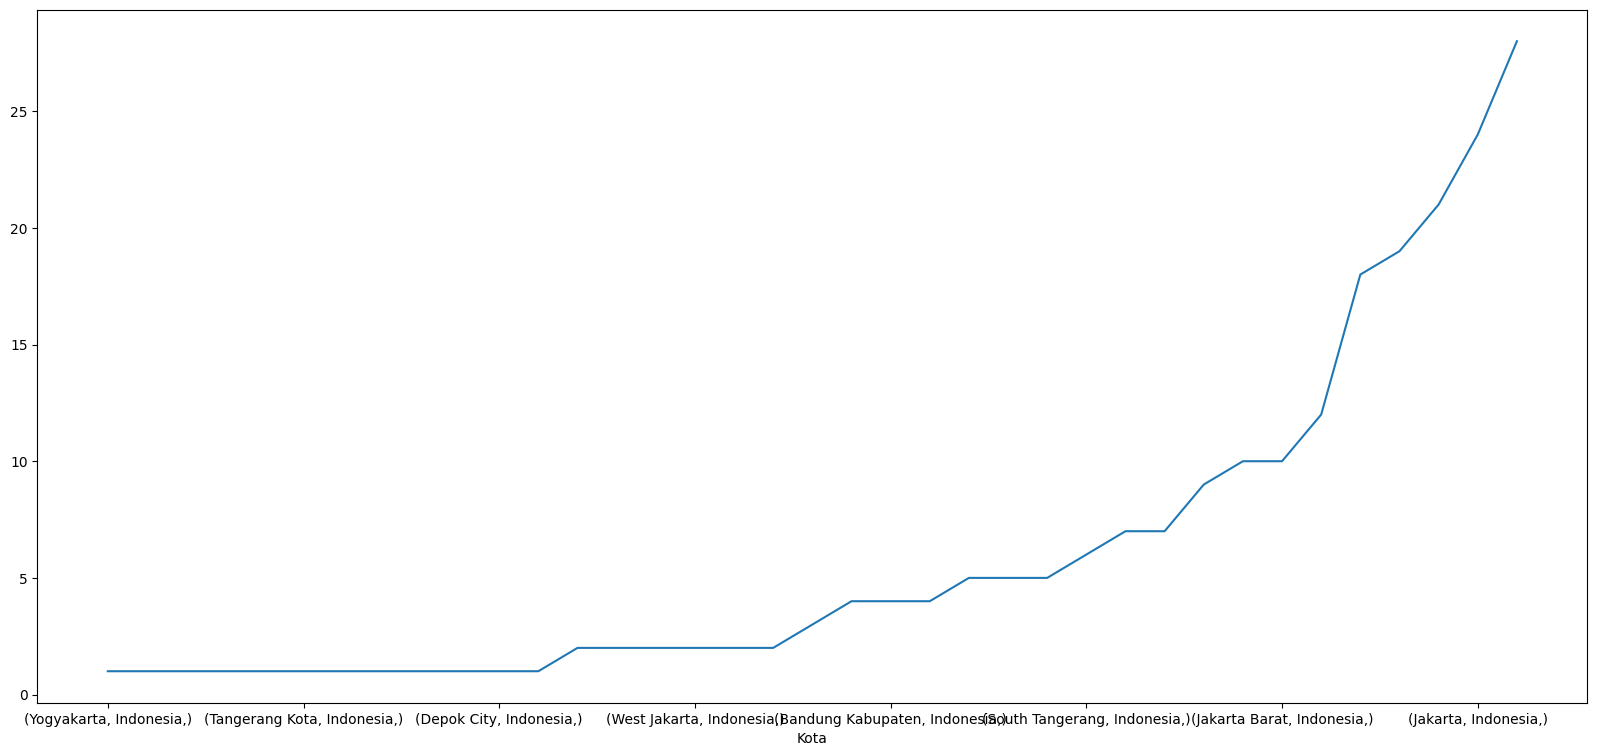

In [41]:
# Membuat visualisasi plot

job_counts.sort_values(ascending=True).plot(figsize=(20,9));

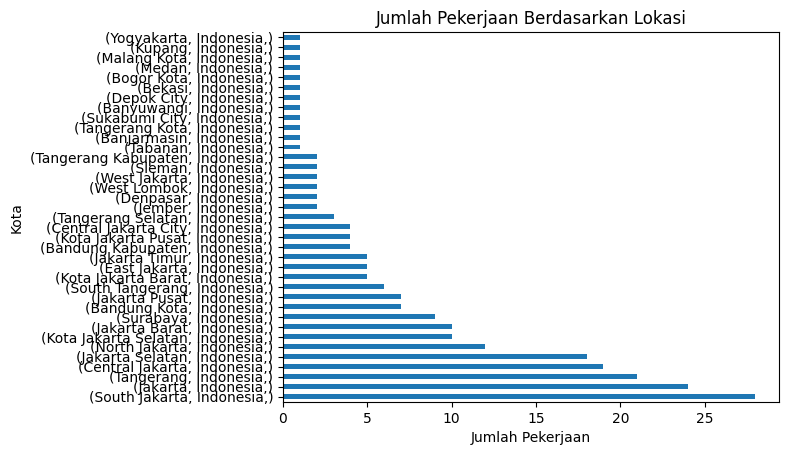

In [36]:
# Membuat visualisasi dengan plot barh

job_counts.plot(kind='barh')
plt.title('Jumlah Pekerjaan Berdasarkan Lokasi')
plt.xlabel('Jumlah Pekerjaan')
plt.ylabel('Kota')
plt.show()

In [37]:
South_Jakarta_Indonesia= 34
Central_Jakarta_Indonesia= 22
Tangerang_Indonesia= 19
Jakarta_Selatan_Indonesia= 19
Jakarta_Indonesia= 17

print(South_Jakarta_Indonesia + Central_Jakarta_Indonesia + Jakarta_Selatan_Indonesia + Jakarta_Indonesia)

92


In [38]:
card_data = f'{job_counts.mean().round(2)}'

In [39]:
card_data

'6.08'

**INSIGHT**

1. Jumlah pekerjaan yang membuka lowongan terbanyak ada di south jakarta dengan jumlah mencapai 34 lowongan pekerjaan yang di post pada website tersebut.
2. Pada top 5 kota yang memiliki jumlah lowongan pekerjaan terbanyak didominasi oleh Jakarta.
3. Pada top 5 kota tersebut diantaranya ada tangerang yang menduduki peringkat ke 3 dalam jumlah lowongan pekerjaan yang paling besar.
4. Dalam top 5 tersebut, dapat disimpulkan bahwa jakarta memiliki total lowongan pekerjaan sebanyak 92 lowongan.
5. Didapati kesimpulan bahwa jakarta adalah kota yang paling banyak membuka lowongan pekerjaan di website tersebut (Berdasarkan 15 halaman web pertama yang diambil)

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.